<a href="https://colab.research.google.com/github/carlos-souza-blip/Coursera-/blob/master/Modelo_RMHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação ao Banco de Dados para RMHP

-> Incluindo as bibliotecas que iremos utilizar para análisar o banco de dados;

-> Inserindo os dados RMHP_SELEÇÃO_GO;

-> Organizando a estrutura de dados, retirando as colunas de não interesse.

In [110]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [111]:
df1 = pd.read_csv('https://raw.githubusercontent.com/carlos-souza-blip/Trabalho-de-Analise-de-Risco/main/rmhp_selecao_go_2.csv', sep= ",")
df2 = pd.read_csv('https://raw.githubusercontent.com/carlos-souza-blip/Trabalho-de-Analise-de-Risco/main/rmhp_selecao_go_3.csv', sep= ",")
dados1 = pd.concat([df1, df2], ignore_index= True)
dados1.columns

Index(['cnes', 'sexo', 'idade', 'diag_princ', 'dias_perm', 'ano', 'fxidade',
       'cid50', 'permanencia', 'uso_uti', 'obito', 'icc', 'ieh'],
      dtype='object')

In [112]:
dados1['obito'].value_counts()

0    944074
1     60596
Name: obito, dtype: int64

In [113]:
# ORGANIZANDO AS VARIAVEIS PARA O TESTE
dados = dados1[['ano', 'obito', 'icc', 'ieh', 'uso_uti', 'permanencia', 'fxidade', 'cid50']]
dados.head(2)

,ano,obito,icc,ieh,uso_uti,permanencia,fxidade,cid50
0,2015,0,0,0,0,2,1,0
1,2015,0,0,0,0,2,2,1


# Testado o modelo ROC

In [114]:
dados1.columns

Index(['cnes', 'sexo', 'idade', 'diag_princ', 'dias_perm', 'ano', 'fxidade',
       'cid50', 'permanencia', 'uso_uti', 'obito', 'icc', 'ieh'],
      dtype='object')

In [115]:
# Usando sexo
print('AUC: %0.2f' % roc_auc_score(dados1.obito, dados1.icc + dados1.ieh + dados1.permanencia +
                                   dados1.uso_uti + dados1.cid50 + dados1.fxidade))

AUC: 0.79


In [116]:
modelo = roc_auc_score(dados1.obito, dados1.sexo + dados1.fxidade)
print('AUC: %0.2f' % modelo)
model = roc_auc_score(dados1.obito, dados1.sexo + dados1.fxidade + dados1.cid50)
print('AUC: %0.2f' % model)
modelo1 = roc_auc_score(dados1.obito, dados1.sexo + dados1.fxidade + dados1.cid50 + dados1.ieh)
print('AUC: %0.2f' % modelo1)
modelo2 = roc_auc_score(dados1.obito, dados1.sexo + dados1.fxidade + dados1.cid50 + dados1.ieh + dados1.icc)
print('AUC: %0.2f' % modelo2)
modelo3 = roc_auc_score(dados1.obito, dados1.sexo + dados1.fxidade + dados1.cid50 + dados1.ieh + dados1.icc + dados1.permanencia)
print('AUC: %0.2f' % modelo3)
modelo4 = roc_auc_score(dados1.obito, dados1.sexo + dados1.fxidade + dados1.cid50 + dados1.ieh + dados1.icc + dados1.permanencia + dados1.uso_uti)
print('AUC: %0.2f' % modelo4)
modelo5 = roc_auc_score(dados1.obito, dados1.fxidade + dados1.cid50 + dados1.ieh + dados1.icc + dados1.permanencia + dados1.uso_uti)
print('AUC: %0.2f' % modelo5)

AUC: 0.66
AUC: 0.68
AUC: 0.69
AUC: 0.71
AUC: 0.73
AUC: 0.76
AUC: 0.79


# Aplicando a Regressão Logística

-> Separando a variável resposta y = Obito e serando as variáveis explicativas X = colunas restantes do banco de dados;

-> Separando o banco de dados em 30% treino = X_train and y_train, logo após o restante dos 70% são testes = X_test and y_test;

-> Obtenção dos coeficientes, R^2, intercepto, acorácia e matriz confusão;

-> Testando o modelo, aplicando variáveis explicativas com dado fictício.

In [117]:
# Separando os Dados para teste e treino
# Iremos trabalhar com os dados de treino para verificar o modelo de regressão com 0,3% dos dados separados
y = dados.obito
X = pd.get_dummies(dados[['icc', 'ieh', 'uso_uti', 'permanencia', 'fxidade', 'cid50']])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [118]:
reg_logistica = LogisticRegression()
reg_logistica.fit(X_train, y_train)
y_predict = reg_logistica.predict(X_train)

In [119]:
reg_logistica.fit(X_train, y_train)
print('Coeficientes:', reg_logistica.coef_)

Coeficientes: [[0.30170797 0.14546475 2.29953448 0.01072904 0.39451351 0.6349476 ]]


In [120]:
print('Intercepto: %0.2f' %reg_logistica.intercept_)

Intercepto: -4.74


In [121]:
print(classification_report(y_train, reg_logistica.predict(X_train)))
#log_reg = sm.Logit(y_train, X_train).fit()
#print(log_reg.summary())

              precision    recall  f1-score   support

           0       0.94      0.99      0.97    660844
           1       0.44      0.09      0.15     42425

    accuracy                           0.94    703269
   macro avg       0.69      0.54      0.56    703269
weighted avg       0.91      0.94      0.92    703269



In [122]:
print ('R-squared: %0.2f' % reg_logistica.score(X_train, y_train))

R-squared: 0.94


In [123]:
import seaborn as sn
import matplotlib.pyplot as plt

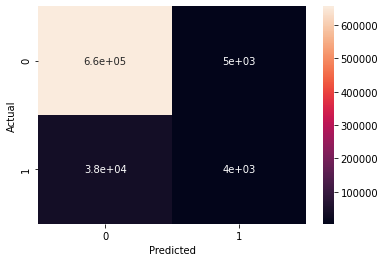

In [124]:
# Matriz de confusão, com a finalidade misturar os dados de treino
confusion_matrix = pd.crosstab(y_train, y_predict, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [125]:
acuracia = accuracy_score(y_train, reg_logistica.predict(X_train))
print('O modelo obteve %0.2f de acurácia.' % acuracia)

O modelo obteve 0.94 de acurácia.


In [126]:
# Testando o modelo para verificar se a pessoa morre com tais parametros
teste = {'icc':0, 'ieh':0, 'uso_uti':1, 'permanencia':1, 'fxidade':1, 'cid50':0}
df = pd.DataFrame(data = teste, index=[0])
print(df)

   icc  ieh  uso_uti  permanencia  fxidade  cid50
0    0    0        1            1        1      0


In [127]:
obito_esp = reg_logistica.predict_proba(df)

In [128]:
# Imprindo o resultado do modelo, com a finalidade de verificar se o individuo morreu ou não,
#aplicando as variaveis correspondentes
print(obito_esp)

[[0.88491776 0.11508224]]


# Curva ROC

-> Testando o indice ROC, segundo aplicação da Regressão Logística, através dos dados de treino (X_train, y_train);

-> Gráfico da curva ROC, segundo a predição da Regressão Logística.

In [129]:
# Cura de Roc
print('Estimativa ROC: %0.2f' % roc_auc_score(y_test, reg_logistica.predict_proba(X_test)[:, 1]))

Estimativa ROC: 0.85


In [130]:
# Calculando a probabilidade de chances de correr uma morte através de X_train, em relação a y_train
prob = reg_logistica.predict_proba(X_train)[:,1]
print(prob)

[0.0130137  0.0130137  0.06005282 ... 0.02820553 0.01918717 0.0189863 ]


In [131]:
y_train.value_counts()

0    660844
1     42425
Name: obito, dtype: int64

In [132]:
# Soma esperado de mortes.
print('%0.0f' %prob.sum())

42425


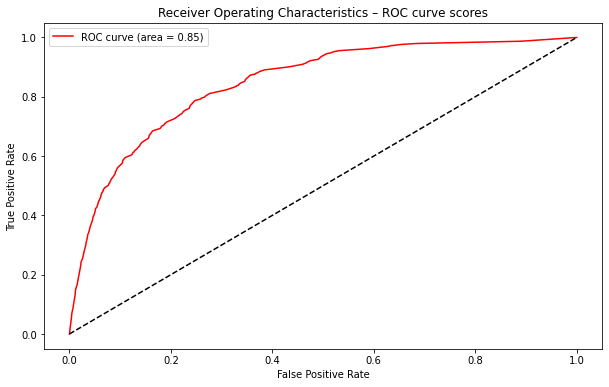

In [133]:
# Criando uma definição para plotar o gráfico de ROC
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics – ROC curve scores')
    plt.legend()
    plt.show()
plot_roc_curve(y_train, prob)

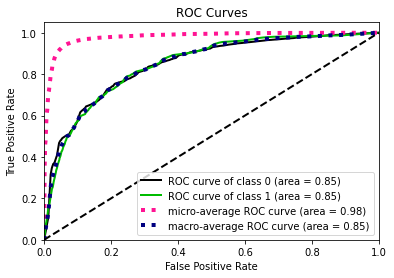

In [134]:
import scikitplot as skplt
>>> lr = LogisticRegression()
>>> lr = lr.fit(X_train, y_train)
>>> y_probas = lr.predict_proba(X_test)
>>> skplt.metrics.plot_roc(y_test, y_probas)

>>> plt.show()

# Testando o modelo para 2506661 (HDT)


In [135]:
ds = pd.read_csv('https://raw.githubusercontent.com/carlos-souza-blip/Trabalho-de-Analise-de-Risco/main/2506661_HDT.csv', sep= ",")

In [136]:
ds1 = ds[['icc', 'ieh', 'uso_uti', 'permanencia', 'fxidade', 'cid50']]

In [137]:
obito_esp = reg_logistica.predict_proba(ds1)[:,1]
print('Segundo o Modelo da Reg. Logistica, obtivemos como número esperado %0.0f mortes.' %obito_esp.sum())

Segundo o Modelo da Reg. Logistica, obtivemos como número esperado 887 mortes.


In [138]:
ds['obito'].value_counts()

0    7808
1     917
Name: obito, dtype: int64

In [139]:
# Taxa = Total de óbitos observados / óbito esperado 
taxa = 917 / 887
print('obtivemos uma taxa_HDT de %0.02f' % taxa)

obtivemos uma taxa_HDT de 1.03


In [140]:
print('Estimativa ROC: %0.4f' % roc_auc_score(ds.obito, reg_logistica.predict_proba(ds1)[:, 1]))

Estimativa ROC: 0.8338


# Testando o modelo para 0024074

In [141]:
dataset = pd.read_csv('https://raw.githubusercontent.com/carlos-souza-blip/Trabalho-de-Analise-de-Risco/main/24074_CSV.csv', sep= ",")
dataset1 = ds[['icc', 'ieh', 'uso_uti', 'permanencia', 'fxidade', 'cid50']]

In [142]:
dataset['obito'].value_counts()

0    2706
1     613
Name: obito, dtype: int64

In [143]:
obito_esp1 = reg_logistica.predict_proba(dataset1)[:,1]
print('Segundo o Modelo da Reg. Logistica, obtivemos como número esperado %0.0f mortes.' %obito_esp1.sum())

Segundo o Modelo da Reg. Logistica, obtivemos como número esperado 887 mortes.


In [144]:
taxa_1 = 613 / 385
print('obtivemos uma taxa_24074 de %0.02f' % taxa_1)

obtivemos uma taxa_24074 de 1.59
